In [42]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import pickle

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#chunks = pd.read_json('data/review.json', lines=True, chunksize = 10000)

In [3]:
#for c in chunks:
#    chunk = c
#    break

In [4]:
#chunk

In [5]:
#This line of code in the terminal, randomly samples the json file and makes a new json file
#cat review.json | awk 'BEGIN {srand()} !/^$/ { if (rand() <= .05) print $0}' > sample_review.json

In [6]:
data = pd.read_json('data/sample_review.json', lines=True)

In [7]:
data.drop(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool', 'date'], axis=1, inplace=True)

In [8]:
data

,stars,text
0,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
1,5,Maria is VERY good at what she does with great...
2,4,Paid a visit here after the JT concert on Frid...
3,5,"I went for the second time yesterday, and it d..."
4,5,I normally don't bother with dealing health st...
...,...,...
402224,5,Katherine is a great piano teacher! She is so ...
402225,1,"Never in my life, of 62 years, have I ever tas..."
402226,1,This restaurant was dirty and in complete disa...
402227,5,"This salon is very clean, professional and upb..."


In [9]:
rows, cols = data.shape

In [10]:
sentiment = []
for row in range(rows):
    rating = data.loc[row, 'stars']
    if rating < 3:
        sentiment.append(-1)
    elif rating == 3:
        sentiment.append(0)
    else:
        sentiment.append(1)

In [11]:
data['sentiment'] = sentiment

In [12]:
data

,stars,text,sentiment
0,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",-1
1,5,Maria is VERY good at what she does with great...,1
2,4,Paid a visit here after the JT concert on Frid...,1
3,5,"I went for the second time yesterday, and it d...",1
4,5,I normally don't bother with dealing health st...,1
...,...,...,...
402224,5,Katherine is a great piano teacher! She is so ...,1
402225,1,"Never in my life, of 62 years, have I ever tas...",-1
402226,1,This restaurant was dirty and in complete disa...,-1
402227,5,"This salon is very clean, professional and upb...",1


In [13]:
data['sentiment'].describe()

count    402229.000000
mean          0.417494
std           0.849063
min          -1.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sentiment, dtype: float64

In [14]:
y = data['sentiment']

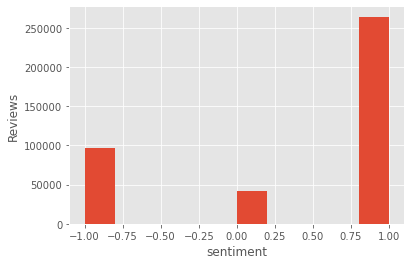

In [15]:
plt.hist(y)
plt.ylabel('Reviews')
plt.xlabel('sentiment')
plt.show()

In [16]:
corpus = data['text'].tolist()

In [17]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english',ngram_range=(1,2), min_df=.01)

In [18]:
X = vectorizer.fit_transform(corpus)

In [19]:
X

<402229x823 sparse matrix of type '<class 'numpy.float64'>'
	with 10379582 stored elements in Compressed Sparse Row format>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
rf = RandomForestClassifier(n_jobs=-1)

In [22]:
sm = SMOTE(random_state=37, n_jobs=-1)

In [23]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 264003, -1: 96075, 0: 42151})


In [24]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [26]:
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({1: 198110, -1: 198110, 0: 198110})


In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
rf.score(X_test, y_test)

0.8033174884146462

In [29]:
rfpred = rf.predict(X_test)

In [30]:
residual = rfpred - y_test

Text(0.5, 0, 'Score')

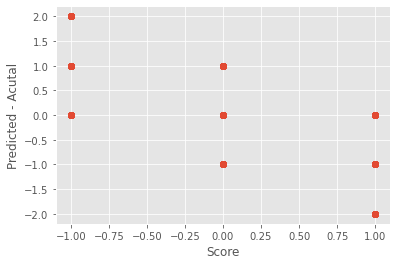

In [31]:
plt.scatter(y_test, residual)
plt.ylabel('Predicted - Acutal')
plt.xlabel('Score')

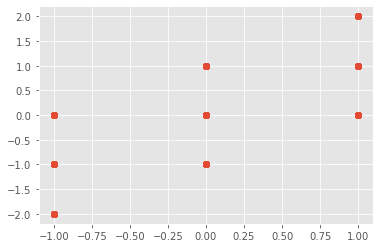

In [32]:
plt.scatter(rfpred, residual)

In [33]:
imp = rf.feature_importances_

In [34]:
bow = vectorizer.get_feature_names()

In [35]:
#bag of words from most important feature to least
bws = []
for word in imp.argsort()[::-1]:
    bws.append(bow[word])

In [36]:
bws

['great',
 'good',
 'amazing',
 'delicious',
 'best',
 'love',
 'worst',
 'friendly',
 'definitely',
 'told',
 'place',
 'horrible',
 'rude',
 'said',
 'food',
 'nice',
 'excellent',
 'awesome',
 'ok',
 'pretty',
 'recommend',
 'service',
 'terrible',
 'time',
 'asked',
 'money',
 'bit',
 'like',
 'just',
 'decent',
 'perfect',
 'favorite',
 'really',
 'manager',
 'little',
 'bad',
 'highly',
 'don',
 'staff',
 'didn',
 'customer',
 've',
 'overall',
 'called',
 'fresh',
 'highly recommend',
 'try',
 'minutes',
 'okay',
 'left',
 'wasn',
 'fantastic',
 'average',
 'wonderful',
 'better',
 'thank',
 'helpful',
 'got',
 'ordered',
 'loved',
 'menu',
 'happy',
 'experience',
 'poor',
 'vegas',
 'went',
 'tasty',
 'stars',
 'order',
 'people',
 'super',
 'did',
 'come',
 'professional',
 'going',
 'came',
 'clean',
 'new',
 'pretty good',
 'awful',
 'disappointed',
 'make',
 'business',
 'right',
 'waste',
 'know',
 'restaurant',
 'way',
 'took',
 'company',
 'sure',
 'won',
 'enjoyed',
 '

In [37]:
len(bws)

823

In [38]:
importances =rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 298 (0.040973)
2. feature 293 (0.021288)
3. feature 25 (0.018793)
4. feature 169 (0.016453)
5. feature 64 (0.015950)
6. feature 414 (0.013935)
7. feature 811 (0.013882)
8. feature 271 (0.012921)
9. feature 167 (0.010356)
10. feature 733 (0.009812)
11. feature 521 (0.009595)
12. feature 336 (0.008814)
13. feature 592 (0.008153)
14. feature 596 (0.008152)
15. feature 259 (0.008137)
16. feature 465 (0.007593)
17. feature 219 (0.007567)
18. feature 47 (0.007338)
19. feature 477 (0.007313)
20. feature 543 (0.007076)
21. feature 571 (0.006834)
22. feature 633 (0.006570)
23. feature 718 (0.006232)
24. feature 727 (0.005936)
25. feature 35 (0.005857)
26. feature 449 (0.005721)
27. feature 68 (0.005550)
28. feature 389 (0.005463)
29. feature 365 (0.005398)
30. feature 164 (0.005353)
31. feature 510 (0.005108)
32. feature 240 (0.004589)
33. feature 564 (0.004571)
34. feature 428 (0.004514)
35. feature 395 (0.004507)
36. feature 50 (0.004431)
37. feature 329 (0.004408)

In [39]:
y_pred = rf.predict(X_test)

              precision    recall  f1-score   support

          -1       0.74      0.78      0.76     24232
           0       0.37      0.24      0.29     10433
           1       0.87      0.90      0.88     65893

    accuracy                           0.80    100558
   macro avg       0.66      0.64      0.64    100558
weighted avg       0.79      0.80      0.79    100558

[[18981  1437  3814]
 [ 2710  2455  5268]
 [ 3788  2761 59344]]


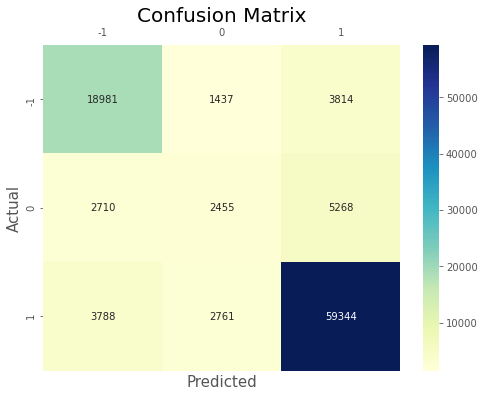

In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
categories=['-1','0', '1']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=categories, yticklabels=categories, ax=ax,cmap="YlGnBu")
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.savefig('rap_r&_heatmap.png')

In [43]:
pickle.dump(rf, open('rf_2feature_model.pkl','wb'))